
作者：J.R. Johansson (邮箱：jrjohansson@gmail.com)

译者：一路向上

最新版本的用法介绍见网站http://github.com/jrjohansson/scientific-python-lectures. 其他相关介绍见http://jrjohansson.github.io.

In [2]:
# 调用绘图函数
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image

## 简介

SciPy框架建立于低一级的NumPy框架的多维数组之上，并且提供了大量的高级的科学算法。一些SciPy的应用如下：

1. 特殊函数 (scipy.special)
2. 积分 (scipy.integrate)
3. 优化 (scipy.optimize)
4. 插值 (scipy.interpolate)
5. 傅里叶变换 (scipy.fftpack)
6. 信号处理 (scipy.signal)
7. 线型代数 (scipy.linalg)
8. 稀疏特征值问题 (scipy.sparse)
9. 统计 (scipy.stats)
10. 多维图像处理 (scipy.ndimage)
11. 文件输入输出 (scipy.io)

这些模块提供了大量的函数和类，可以用来解决各自领域的问题。
在本节中我们将看到如何使用这些子函数包。
我们首先导入scipy程序包：

In [3]:
from scipy import *

如果我们只需要用scipy框架中的一部分，我们也可以选择性的导入。例如，只导入线性代数函数包la，我们可以：

In [4]:
import scipy.linalg as la

## 特殊函数

大量的数学函数对许多物理问题的计算是非常重要的。SciPy提供了一系列非常广泛的特殊函数。详见http://docs.scipy.org/doc/scipy/reference/special.html#module-scipy.special.

为了说明指定的特殊函数的用法，我们先看一下贝塞尔函数的使用细节：

In [5]:
# scipy.special 包含了大量的贝塞尔函数
# 我们使用函数jn 和 yn, 它们是第一类和第二类实值贝塞尔函数
# jn_zeros 和 yn_zeros 代表了jn 和 yn 函数的零点
#
from scipy.special import jn, yn, jn_zeros, yn_zeros

In [6]:
n = 0    
x = 0.0

# 第一类贝塞尔函数
print "J_%d(%f) = %f" % (n, x, jn(n, x))

x = 1.0
# 第二类贝塞尔函数
print "Y_%d(%f) = %f" % (n, x, yn(n, x))

J_0(0.000000) = 1.000000
Y_0(1.000000) = 0.088257


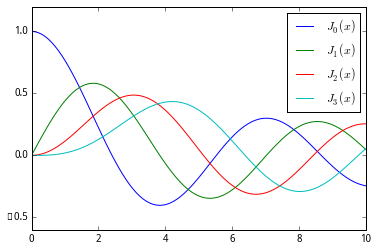

In [7]:
x = linspace(0, 10, 100)

fig, ax = plt.subplots()
for n in range(4):
    ax.plot(x, jn(n, x), label=r"$J_%d(x)$" % n)
ax.legend();

In [8]:
# 贝塞尔函数的零点
n = 0 
m = 4 # 计算的零点的个数
jn_zeros(n, m)

array([  2.40482556,   5.52007811,   8.65372791,  11.79153444])

## 积分

### 数值积分：求积公式

对f(x)从a到b的积分叫做数值积分，也叫简单积分。SciPy提供了一系列计算不同数值积分的函数，包括quad,dblquad和tplquad，分别包含二重和三重积分。

In [9]:
from scipy.integrate import quad, dblquad, tplquad

quad有一系列的可供选择的参数，可以用来调节函数的各种行为（输入help(quad)获取更多信息）。

其基本用途如下：

In [10]:
# 定义一个简单函数作为被积函数
def f(x):
    return x

In [11]:
x_lower = 0 # x积分下限
x_upper = 1 # x积分上限

val, abserr = quad(f, x_lower, x_upper)

print "integral value =", val, ", absolute error =", abserr 

integral value = 0.5 , absolute error = 5.55111512313e-15


如果我们需要添加更多对于被积函数的参数，可以使用args关键字参数：

In [12]:
def integrand(x, n):
    """
    Bessel function of first kind and order n. 
    """
    return jn(n, x)


x_lower = 0  # x积分下限
x_upper = 10 # x积分上限

val, abserr = quad(integrand, x_lower, x_upper, args=(3,))

print val, abserr 

0.736675137081 9.3891268825e-13


对于简单函数而言，对于被积函数，我们可以用λ函数（无名称的函数）来代替清晰定义的函数：

In [13]:
val, abserr = quad(lambda x: exp(-x ** 2), -Inf, Inf)

print "numerical  =", val, abserr

analytical = sqrt(pi)
print "analytical =", analytical

numerical  = 1.77245385091 1.42026367809e-08
analytical = 1.77245385091


如上所示，我们可以用'Inf'或者'-Inf'作为积分上下限。高维积分用法相同：

In [14]:
def integrand(x, y):
    return exp(-x**2-y**2)

x_lower = 0  
x_upper = 10
y_lower = 0
y_upper = 10

val, abserr = dblquad(integrand, x_lower, x_upper, lambda x : y_lower, lambda x: y_upper)

print val, abserr 

0.785398163397 1.63822994214e-13


注意，我们需要用λ函数对于y积分的极限，因为它们可以看做是x的函数。

## 常微分方程（ODE）

SciPy提供了两种不同的方法来解决常微分方程：函数odeint的API，和函数类ode面向对象的API。通常odeint比较容易上手，但是ode函数类能够更好的控制函数。

这里我们使用odeint函数，如需了解更多ode函数类的信息，请输入help(ode)。它和odeint很像，但却是面向对象的函数。

使用odeint之前，首先从scipy.integrate中调用它：

In [15]:
from scipy.integrate import odeint, ode

常微分方程系通常写作其一般形式：
     
     y' = f(y, t)
     
其中

     y = [y1(t), y2(t), ..., yn(t)]
     
f的微分是*yi(t)*。为了解决常微分方程，我们需要知道函数*f*和初始条件*y(0)*.

高阶微分方程可以通过引进新的变量作为中间变量。

当我们定义了Python函数*f*和数组*y_0*(*f*和*y(0)*都是数学函数），我们调用odeint函数：

     y_t = odeint(f, y_0, t)
     
t是解决ODE问题需要的时间坐标数组，y_t是对于给定点在时间t的一行数组，每一列代表在给定时间t所对应的一个解y_i(t)。我们下面将会看到如何设置f和y_0.

### 例：复摆

我们考虑一个物理问题：复摆。定义详见http://en.wikipedia.org/wiki/Double_pendulum.

In [16]:
Image(url='http://upload.wikimedia.org/wikipedia/commons/c/c9/Double-compound-pendulum-dimensioned.svg')

$$\dot{\theta_1} = \frac{6}{ml^2} \frac{2p_{\theta_1} - 3cos(\theta_1 - \theta_2) p_{\theta_2}}{16 - 9 cos^2(\theta_1 - \theta_2)} \\
  \dot{\theta_2} = \frac{6}{ml^2} \frac{8p_{\theta_1} - 3cos(\theta_1 - \theta_2) p_{\theta_1}}{16 - 9 cos^2(\theta_1 - \theta_2)} \\
  \dot{p_{\theta_1}} = -\frac{1}{2}ml^2 \big[\dot{\theta_1} \dot{\theta_2} sin(\theta_1 - \theta_2) + 3 \frac{g}{l}sin \theta_1 \big] \\ 
  \dot{p_{\theta_2}} = -\frac{1}{2}ml^2 \big[- \dot{\theta_1} \dot{\theta_2} sin(\theta_1 - \theta_2) +  \frac{g}{l}sin \theta_2 \big]$$

为了让Python代码看起来更简洁，我们引进新的变量，并规定：
$$x = [\theta_1, \theta_2, p_{\theta_1}, p_{\theta_2}] \\$$

$$ \dot{x_1} = \frac{6}{ml^2} \frac{2x_3 - 3cos(x_1 - x_2)x_4}{16 - 9cos^2(x_1 - x_2)} \\
  \dot{x_2} = \frac{6}{ml^2} \frac{8x_4 - 3cos(x_1 - x_2)x_3}{16 - 9cos^2(x_1 - x_2)} \\
  \dot{x_3} = -\frac{1}{2}ml^2 \big[\dot{x_1} \dot{x_2} sin(x_1 - x_2) + 3 \frac{g}{l} sinx_1 \big] \\
  \dot{x_4} = -\frac{1}{2}ml^2 \big[\dot{x_1} \dot{x_2} sin(x_1 - x_2) + \frac{g}{l} sinx_2 \big] $$

In [17]:
g = 9.82
L = 0.5
m = 0.1

def dx(x, t):
    """
    The right-hand side of the pendulum ODE
    """
    x1, x2, x3, x4 = x[0], x[1], x[2], x[3]
    
    dx1 = 6.0/(m*L**2) * (2 * x3 - 3 * cos(x1-x2) * x4)/(16 - 9 * cos(x1-x2)**2)
    dx2 = 6.0/(m*L**2) * (8 * x4 - 3 * cos(x1-x2) * x3)/(16 - 9 * cos(x1-x2)**2)
    dx3 = -0.5 * m * L**2 * ( dx1 * dx2 * sin(x1-x2) + 3 * (g/L) * sin(x1))
    dx4 = -0.5 * m * L**2 * (-dx1 * dx2 * sin(x1-x2) + (g/L) * sin(x2))
    
    return [dx1, dx2, dx3, dx4]

In [18]:
# 确定初始状态
x0 = [pi/4, pi/2, 0, 0]

In [19]:
# 设定时间：从0s - 10s
t = linspace(0, 10, 250)

In [20]:
# 解常微分方程
x = odeint(dx, x0, t)

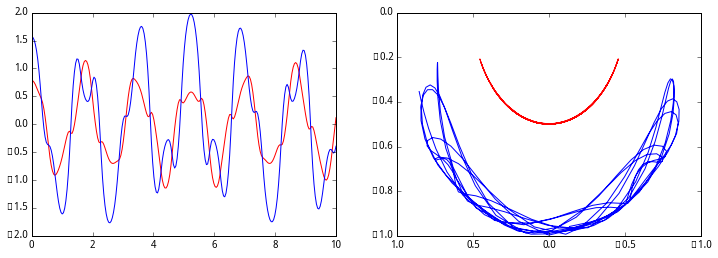

In [21]:
# 绘制角度关于时间的函数图像

fig, axes = plt.subplots(1,2, figsize=(12,4))
axes[0].plot(t, x[:, 0], 'r', label="theta1")
axes[0].plot(t, x[:, 1], 'b', label="theta2")


x1 = + L * sin(x[:, 0])
y1 = - L * cos(x[:, 0])

x2 = x1 + L * sin(x[:, 1])
y2 = y1 - L * cos(x[:, 1])
    
axes[1].plot(x1, y1, 'r', label="pendulum1")
axes[1].plot(x2, y2, 'b', label="pendulum2")
axes[1].set_ylim([-1, 0])
axes[1].set_xlim([1, -1]);

在matplotlib函数的应用中，会介绍如何绘制复摆运动的动图。

In [22]:
from IPython.display import display, clear_output
import time

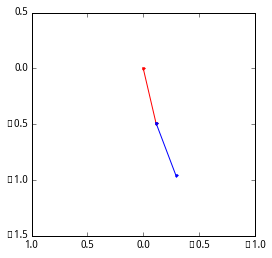

KeyboardInterrupt: 

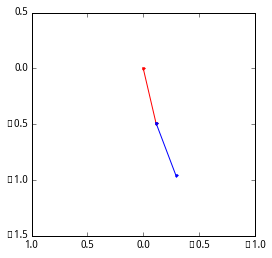

In [23]:
fig, ax = plt.subplots(figsize=(4,4))

for t_idx, tt in enumerate(t[:200]):

    x1 = + L * sin(x[t_idx, 0])
    y1 = - L * cos(x[t_idx, 0])

    x2 = x1 + L * sin(x[t_idx, 1])
    y2 = y1 - L * cos(x[t_idx, 1])
    
    ax.cla()    
    ax.plot([0, x1], [0, y1], 'r.-')
    ax.plot([x1, x2], [y1, y2], 'b.-')
    ax.set_ylim([-1.5, 0.5])
    ax.set_xlim([1, -1])

    clear_output() 
    display(fig)

    time.sleep(0.1)

ps:这里的结果不是报错，是因为最后一行代码是每0.1s更新一次状态，为了后面的函数能够正常运行，我把它停掉了。

### 例： 阻尼谐波振荡器

常微分方程问题对计算物理非常重要，下面我们来看另一个例子：阻尼谐波振荡器。关于概念的解释详见
http://en.wikipedia.org/wiki/Damping.

阻尼谐波振荡器的方程为：

$$\frac{d^2 x}{dt^2} + 2\zeta \omega_0 \frac{dx}{dt} + \omega^2_0 x = 0 \\$$

x是振荡器的位置，$\omega_0$是频率，$\zeta$是阻尼比。为了写出标准形式的二阶常微分方程，我们引入$p = \frac{dx}{dt}$:

$$ \frac{dp}{dt} = -2\zeta \omega_0 p - \omega^2_0 x \\
   \frac{dx}{dt} = p $$

在这个例子中，我们将为常微分方程等号右边的函数添加额外的参数，而不是像前面的例子那样使用全局变量。作为等号右边函数的额外参数的结果，我们需要将一个关键字参数args传递给odeint函数：

In [24]:
def dy(y, t, zeta, w0):
    """
    The right-hand side of the damped oscillator ODE
    """
    x, p = y[0], y[1]
    
    dx = p
    dp = -2 * zeta * w0 * p - w0**2 * x

    return [dx, dp]

In [25]:
# 初始状态: 
y0 = [1.0, 0.0]

In [26]:
# 时间轴
t = linspace(0, 10, 1000)
w0 = 2*pi*1.0

In [27]:
# 在三种不同阻尼比的情况下解常微分方程

y1 = odeint(dy, y0, t, args=(0.0, w0)) # 无阻尼
y2 = odeint(dy, y0, t, args=(0.2, w0)) # 阻尼
y3 = odeint(dy, y0, t, args=(1.0, w0)) # 临界阻尼
y4 = odeint(dy, y0, t, args=(5.0, w0)) # 过阻尼

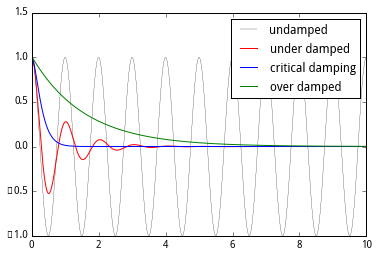

In [28]:
fig, ax = plt.subplots()
ax.plot(t, y1[:,0], 'k', label="undamped", linewidth=0.25)
ax.plot(t, y2[:,0], 'r', label="under damped")
ax.plot(t, y3[:,0], 'b', label=r"critical damping")
ax.plot(t, y4[:,0], 'g', label="over damped")
ax.legend();

## 傅里叶变换

傅里叶变换是计算物理中的一种通用工具，它在不同文章中都会反复出现。SciPy提供能够从NetLib中接入经典FFTPACK库的函数，它是由FORTRAN语言编写的一个行之有效的FFT库。SciPy API有一些额外的便利功能，但总的来说，API和原来的FORTRAN库密切相关。

为了调用fftpack，请输入：

In [29]:
from numpy.fft import fftfreq
from scipy.fftpack import *

为演示如何用SciPy做一个快速傅里叶变换，让我们来看看用FFT如何解决之前讨论的阻尼震荡问题：

In [30]:
N = len(t)
dt = t[1]-t[0]

# 计算快速傅里叶变换
# y2 是前一节中阻尼震荡的解
F = fft(y2[:,0]) 

# 计算频率
w = fftfreq(N, dt)

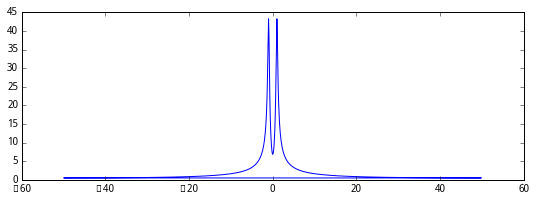

In [31]:
fig, ax = plt.subplots(figsize=(9,3))
ax.plot(w, abs(F));

由于信号是实数，所以谱线图是对称的。我们因此只需要画出对应正频率的部分。为了提取w和F的部分，我们可以运用NumPy库：

In [32]:
indices = where(w > 0) # 只选择对应正频率的指数
w_pos = w[indices]
F_pos = F[indices]

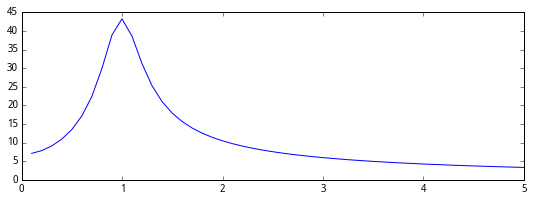

In [33]:
fig, ax = plt.subplots(figsize=(9,3))
ax.plot(w_pos, abs(F_pos))
ax.set_xlim(0, 5);

和预期一样，我们看到谱线图在1处达到最高点，这正是在阻尼震荡这个例子中所采用的频率。

## 线性代数

线性代数部分包含了许多矩阵函数，包括线性方程的解，特征值的解，矩阵函数（例如矩阵指数函数），许多不同的分解（SVD，LU，cholesky）等等。详见：http://docs.scipy.org/doc/scipy/reference/linalg.html.

下面我们看看如何使用这些函数：

### 线性方程组

线性方程组的矩阵形式：

$$ Ax = b \\$$

A是矩阵，x,b是向量。可以求解如下：

In [34]:
from scipy.linalg import *

In [35]:
A = array([[1,2,8], [3,7,6], [2,5,3]])
b = array([1,2,3])

In [36]:
x = solve(A, b)

x

array([-14.6,   6.2,   0.4])

In [37]:
dot(A, x) - b

array([  0.00000000e+00,   5.32907052e-15,   2.66453526e-15])

我们也可以：

$$ AX = B \\$$

这里A,B,X都是矩阵：

In [38]:
A = rand(3,3)
B = rand(3,3)

In [39]:
X = solve(A, B)

In [40]:
X

array([[ 1.02166987,  1.46979092,  0.64004897],
       [-2.1813796 ,  0.2648731 , -3.15222549],
       [ 1.54669347, -0.26698476,  1.98541742]])

In [41]:
# 检验
norm(dot(A, X) - B)

4.677452743560217e-16

### 特征值和特征向量

矩阵A的特征值问题是：

$$ A\nu_n = \lambda_n \nu_n \\$$

这里$\nu_n$是第n个特征向量，$\lambda_n$是第n个特征值：

用eigvals计算矩阵的特征值，用eig计算特征值和特征向量：

In [42]:
evals = eigvals(A)

In [43]:
evals

array([ 1.31586129+0.j,  0.58369033+0.j, -0.07474674+0.j])

In [44]:
evals, evecs = eig(A)

In [45]:
evals

array([ 1.31586129+0.j,  0.58369033+0.j, -0.07474674+0.j])

In [46]:
evecs

array([[-0.19090777, -0.88338693, -0.07776663],
       [-0.66739666,  0.11577427, -0.87511861],
       [-0.71981659,  0.45411876,  0.47761885]])

第n个特征值（储存在evals[n]中）对应的特征向量是evecs的第n列，也就是evecs[:,n]. 为了验证它，我们尝试把矩阵和特征向量相乘，并与特征向量和特征值的乘积做比较：

In [47]:
n = 1

norm(dot(A, evecs[:,n]) - evals[n] * evecs[:,n])

2.1677797545656835e-16

还有许多其他的特殊的本征解，如埃尔米特矩阵（用eigh实现）

### 矩阵运算

In [48]:
# 矩阵的逆
inv(A)

array([[ 1.90665827, -1.01212202,  0.6342907 ],
       [ 2.88091143, -9.0748278 ,  8.35451034],
       [-2.08791043,  5.44756731, -3.73714523]])

In [49]:
# 行列式
det(A)

-0.05740964244539486

In [50]:
# 各阶范数
norm(A, ord=2), norm(A, ord=Inf)

(1.4023823782071045, 1.5259518770408467)

### 稀疏矩阵

稀疏矩阵在处理巨型系统的数值模拟时非常有用，如果描述该问题的矩阵或向量大部分的元素为0。Scipy对于稀疏矩阵有很多处理方法，包括基础的线性代数处理（包括解方程，计算特征值等等）

许多方法都能有效存储稀疏矩阵，一些常用的方法包括坐标形式（COO）,列表的列表形式（LIL），压缩稀疏列（CSC）和压缩稀疏行（CSR）。每种方法都有优势和不足。大多数的计算算法（解方程，矩阵和矩阵相乘等等）都能用CSR或者CSC形式处理，但是它们并不直观，也不太容易进行初始化。所以通常来说，稀疏矩阵采用COO或者LIL进行初始化（我们可以在稀疏矩阵中有效添加元素），然后再转换为CSC或者CSR并进行计算。

更多关于稀疏矩阵的信息，详见：
http://en.wikipedia.org/wiki/Sparse_matrix.

当我们创建了一个稀疏矩阵，我们要选择其存储形式，如：

In [51]:
from scipy.sparse import *

In [52]:
# 稠密矩阵
M = array([[1,0,0,0], [0,3,0,0], [0,1,1,0], [1,0,0,1]]); M

array([[1, 0, 0, 0],
       [0, 3, 0, 0],
       [0, 1, 1, 0],
       [1, 0, 0, 1]])

In [53]:
# 把稠密矩阵变为稀疏矩阵
A = csr_matrix(M); A

<4x4 sparse matrix of type '<type 'numpy.int64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [54]:
# 把稀疏矩阵变为稠密矩阵
A.todense()

matrix([[1, 0, 0, 0],
        [0, 3, 0, 0],
        [0, 1, 1, 0],
        [1, 0, 0, 1]])

创建稀疏矩阵更有效的方法是，建立一个空矩阵，并用所在矩阵的位置填充（避免创建大的稠密矩阵）：

In [55]:
A = lil_matrix((4,4)) # 建立一个4×4的空矩阵
A[0,0] = 1
A[1,1] = 3
A[2,2] = A[2,1] = 1
A[3,3] = A[3,0] = 1
A

<4x4 sparse matrix of type '<type 'numpy.float64'>'
	with 6 stored elements in LInked List format>

In [56]:
A.todense()

matrix([[ 1.,  0.,  0.,  0.],
        [ 0.,  3.,  0.,  0.],
        [ 0.,  1.,  1.,  0.],
        [ 1.,  0.,  0.,  1.]])

In [57]:
A

<4x4 sparse matrix of type '<type 'numpy.float64'>'
	with 6 stored elements in LInked List format>

In [58]:
A = csr_matrix(A); A

<4x4 sparse matrix of type '<type 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [59]:
A = csc_matrix(A); A

<4x4 sparse matrix of type '<type 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Column format>

我们可以像计算稠密矩阵一样，计算稀疏矩阵：

In [60]:
A.todense()

matrix([[ 1.,  0.,  0.,  0.],
        [ 0.,  3.,  0.,  0.],
        [ 0.,  1.,  1.,  0.],
        [ 1.,  0.,  0.,  1.]])

In [61]:
(A * A).todense()

matrix([[ 1.,  0.,  0.,  0.],
        [ 0.,  9.,  0.,  0.],
        [ 0.,  4.,  1.,  0.],
        [ 2.,  0.,  0.,  1.]])

In [62]:
A.todense()

matrix([[ 1.,  0.,  0.,  0.],
        [ 0.,  3.,  0.,  0.],
        [ 0.,  1.,  1.,  0.],
        [ 1.,  0.,  0.,  1.]])

In [63]:
A.dot(A).todense()

matrix([[ 1.,  0.,  0.,  0.],
        [ 0.,  9.,  0.,  0.],
        [ 0.,  4.,  1.,  0.],
        [ 2.,  0.,  0.,  1.]])

In [64]:
v = array([1,2,3,4])[:,newaxis]; v

array([[1],
       [2],
       [3],
       [4]])

In [65]:
# 稀疏矩阵 - 稠密向量的乘积
A * v

array([[ 1.],
       [ 6.],
       [ 5.],
       [ 5.]])

In [66]:
# 稠密矩阵得到同样的结果 - 稠密向量的乘积
A.todense() * v

matrix([[ 1.],
        [ 6.],
        [ 5.],
        [ 5.]])

## 最优化

最优化问题（寻找函数的最大值或者最小值）是数学的一大领域，复杂函数的最优化问题，或者多变量的最优化问题可能会非常复杂。下面我们看一些很简单的例子，更多详细的对于使用SciPy处理最优化问题的介绍，请见：http://scipy-lectures.github.com/advanced/mathematical_optimization/index.html.

首先调用optimize:

In [67]:
from scipy import optimize

### 寻找最小值

首先我们看如何寻找单变量的简单函数的最小值：

In [68]:
def f(x):
    return 4*x**3 + (x-2)**2 + x**4

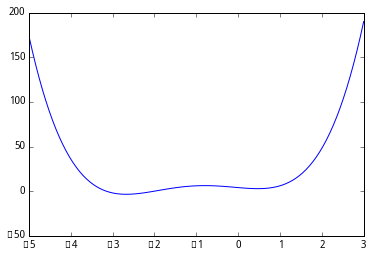

In [69]:
fig, ax  = plt.subplots()
x = linspace(-5, 3, 100)
ax.plot(x, f(x));

我们可以用fmin_bfgs寻找函数的最小值：

In [70]:
x_min = optimize.fmin_bfgs(f, -2)
x_min 

Optimization terminated successfully.
         Current function value: -3.506641
         Iterations: 6
         Function evaluations: 30
         Gradient evaluations: 10


array([-2.67298167])

In [71]:
optimize.fmin_bfgs(f, 0.5) 

Optimization terminated successfully.
         Current function value: 2.804988
         Iterations: 3
         Function evaluations: 15
         Gradient evaluations: 5


array([ 0.46961745])

我们还可以用brent或者fminbound函数，它们采用了不太一样的语法和算法。

In [72]:
optimize.brent(f)

0.46961743402759754

In [73]:
optimize.fminbound(f, -4, 2)

-2.6729822917513886

### 寻找函数的解

为了寻找函数f(x) = 0 的解，我们可以用fsolve函数，它需要一个初始的猜测值：

In [74]:
omega_c = 3.0
def f(omega):
    # 超越方程：低Q值的SQUID微波谐振器的共振频率
    return tan(2*pi*omega) - omega_c/omega

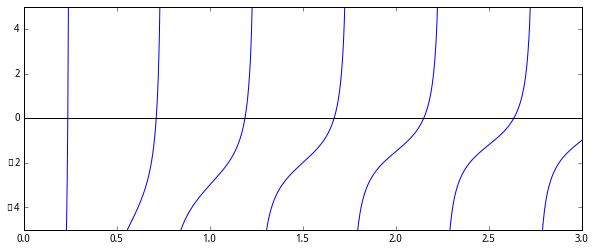

In [75]:
#import matplotlib
#matplotlib.rcParams['axes.unicode_minus']=False
fig, ax  = plt.subplots(figsize=(10,4))
x = linspace(0, 3, 1000)
y = f(x)
mask = where(abs(y) > 50)
x[mask] = y[mask] = NaN # 当函数变换符号时避免产生垂直线
ax.plot(x, y)
ax.plot([0, 3], [0, 0], 'k')
ax.set_ylim(-5,5);

In [76]:
optimize.fsolve(f, 0.1)

array([ 0.23743014])

In [77]:
optimize.fsolve(f, 0.6)

array([ 0.71286972])

In [78]:
optimize.fsolve(f, 1.1)

array([ 1.18990285])

## 插值

插值在SciPy中能够很容易和方便的实现：interpid函数，当描述X和Y的数据时，返回值是被称之为x的任意值（X的范围）的函数，同时返回相应的插值y：

In [79]:
from scipy.interpolate import *

In [80]:
def f(x):
    return sin(x)

In [81]:
n = arange(0, 10)  
x = linspace(0, 9, 100)

y_meas = f(n) + 0.1 * randn(len(n)) # 噪声模拟测量
y_real = f(x)

linear_interpolation = interp1d(n, y_meas)
y_interp1 = linear_interpolation(x)

cubic_interpolation = interp1d(n, y_meas, kind='cubic')
y_interp2 = cubic_interpolation(x)

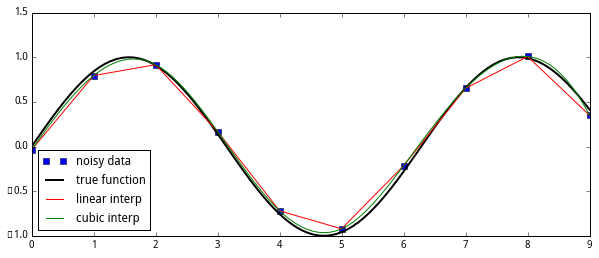

In [82]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(n, y_meas, 'bs', label='noisy data')
ax.plot(x, y_real, 'k', lw=2, label='true function')
ax.plot(x, y_interp1, 'r', label='linear interp')
ax.plot(x, y_interp2, 'g', label='cubic interp')
ax.legend(loc=3);

## 统计

scipy.stats包含了许多统计分布，统计函数和检验。完整的功能请见：http://docs.scipy.org/doc/scipy/reference/stats.html.

还有一个非常强大的统计模型的包叫做statsmodels，详见： http://statsmodels.sourceforge.net.

In [83]:
from scipy import stats

In [84]:

# 创建一个（离散）符合泊松分布的随机变量

X = stats.poisson(3.5) # 对于n = 3.5光子相干态的光子数分布

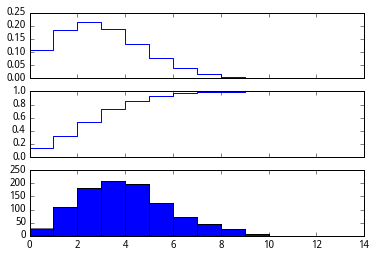

In [85]:
n = arange(0,15)

fig, axes = plt.subplots(3,1, sharex=True)

# 绘制概率质量函数 (PMF)
axes[0].step(n, X.pmf(n))

# 绘制累计分布函数 (CDF)
axes[1].step(n, X.cdf(n))

# 绘制随机变量 X 的1000次随机实现的直方图
axes[2].hist(X.rvs(size=1000));

In [86]:
# 创建一个符合（连续）正态分布的随机变量
Y = stats.norm()

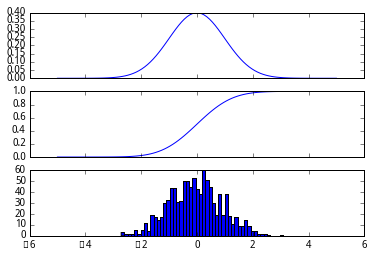

In [87]:
x = linspace(-5,5,100)

fig, axes = plt.subplots(3,1, sharex=True)

# 绘制概率分布函数 (PDF)
axes[0].plot(x, Y.pdf(x))

# 绘制累计分布函数 (CDF)
axes[1].plot(x, Y.cdf(x));

# 绘制随机变量 Y 的1000次随机实现的直方图
axes[2].hist(Y.rvs(size=1000), bins=50);

统计结果：

In [88]:
X.mean(), X.std(), X.var() # 泊松分布

(3.5, 1.8708286933869707, 3.5)

In [89]:
Y.mean(), Y.std(), Y.var() # 正态分布

(0.0, 1.0, 1.0)

### 统计检验

检验两组（独立）随机数据是否来自同一个分布：

In [90]:
t_statistic, p_value = stats.ttest_ind(X.rvs(size=1000), X.rvs(size=1000))

print "t-statistic =", t_statistic
print "p-value =", p_value

t-statistic = 0.215937352239
p-value = 0.829058623039


因为p值很大，我们不能拒绝原假设（两组随机数据有相同的均值）。

为了检验单个样本的数据是否均值为0.1（实际均值为0.0）：

In [91]:
stats.ttest_1samp(Y.rvs(size=1000), 0.1)

(-2.1668968085719977, 0.030478493763385503)

p值很小，意味着我们可以拒绝原假设（Y的均值为0.1）。

In [92]:
Y.mean()

0.0

In [93]:
stats.ttest_1samp(Y.rvs(size=1000), Y.mean())

(0.10118531616888854, 0.91942365671744386)

## 延伸阅读

http://www.scipy.org - SciPy的官方网页

http://docs.scipy.org/doc/scipy/reference/tutorial/index.html - SciPy的一个教程

https://github.com/scipy/scipy/ - SciPy源代码.


## 版本

In [ ]:
%reload_ext version_information

%version_information numpy, matplotlib, scipy